In [0]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [0]:
env = gym.make("Taxi-v3")
action_num = env.action_space.n
obs_num = env.observation_space.n

In [0]:
# Learning Parameters
episodes_num = 30000
learning_rate = 0.7
max_steps = 99
discount = 0.618
epsilon = 1.0
epsilon_min = 0.01
epsilon_max = 1.0
decay_rate = 0.01

In [0]:
q_table = np.zeros((obs_num, action_num))

In [0]:
def greedy(eps):
  pivot = random.uniform(0, 1)
  return pivot > eps

In [6]:
%%time

rewards = []
steps_till_success = []

for episode in range(episodes_num):
  state = env.reset()
  reward = 0
  step = 0
  done = False
  cumul_rewards = 0

  for step in range(max_steps):
    # env.render()

    # Choose an action
    if greedy(epsilon):
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()

    # Perform it
    new_state, reward, done, _ = env.step(action)

    # Update q-table
    q_table[state, action] = q_table[state, action] + learning_rate * (reward + 
                  discount * np.max(q_table[new_state, :]) - q_table[state, action])
    state = new_state

    cumul_rewards += reward

    if done == True:
      break

  # env.render()
  rewards.append(cumul_rewards)
  epsilon = epsilon_min + (epsilon_max - epsilon_min)*np.exp(-decay_rate * episode) 
  # if episode % 5000 == 0:
  #   learning_rate = learning_rate / 2
  # print("**********************************************************************")

env.close()
print(f'Average reward:{sum(rewards)/episodes_num}')
# print(f'Min step to success: {min(steps_till_success)}')

Average reward:5.637433333333333
CPU times: user 11 s, sys: 20.4 ms, total: 11.1 s
Wall time: 11 s


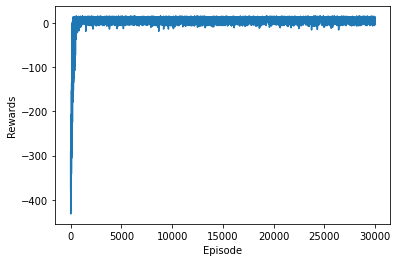

In [7]:
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.show()

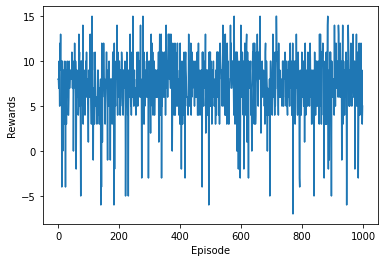

In [8]:
plt.plot(rewards[-1000:-1])
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.show()

In [13]:
print(q_table)

[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.50514091  -2.43624423  -2.50422574  -2.43401189  -2.32039715
  -11.42977047]
 [ -1.83930037  -1.35824993  -1.8395794   -1.36268105  -0.57891593
  -10.35237099]
 ...
 [ -0.59030786   0.6813658   -0.61650448  -1.35781437  -9.60543454
   -9.57893538]
 [ -2.38142417  -2.3656948   -2.40059498  -2.15654126 -10.9137713
  -10.44148248]
 [ -0.91        -0.7         -0.7         11.35999221  -4.68282136
   -7.        ]]


In [9]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            env.render()
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 16
****************************************************
EPISODE  1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 11
****************************************************
EPISODE  2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 10
****************************************************
EPISODE  3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 11
****************************************************
EPISODE  4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 14


In [12]:
rewards_test = []
steps = []

for episode in range(1000):
    state = env.reset()
    total_reward = 0
    step = 0
    done = False

    for step in range(max_steps):
        
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)

        total_reward += reward
        
        if done:
          break
        state = new_state
    rewards_test.append(total_reward)

env.close()

print(f'Average reward: {np.mean(rewards)}')
# print(f'Average steps: {np.mean(steps)}')
print(np.var(rewards))

Average reward: 5.637433333333333
436.32977874555553


In [0]:
# df1 = pd.DataFrame()
# df1['steps'] = steps_till_success
# df1.to_csv('Q_tab_Taxi_50000_steps.csv')
# files.download(r'Q_tab_Taxi_50000_steps.csv')

df2 = pd.DataFrame()
df2['rewards'] = rewards
df2.to_csv('Q_tab_Taxi_30000_rewards.csv')
files.download(r'Q_tab_Taxi_30000_rewards.csv')